# Global Stocks Resources

https://docs.google.com/spreadsheets/d/1fJyqPkmF43ugiLT-v2jc9yxnruyycMbZnIFa6apAijs/edit?gid=0#gid=0



# 一些import

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# 自动重新加载类
%load_ext autoreload
%autoreload 2
# class是关键字 切忌不能用来命名
from src.classes.technical_analysis import TechnicalAnalysis




# 从yahoo finance上取得数据

## Nvdia only

In [2]:
df2 = yf.download(["NVDA"],period="1y",interval="1d")

df2.columns = ["Close","High","Low","Open","Volume"]

display(df2)

C:\Users\yuting.d.zhang\AppData\Local\Temp\ipykernel_13236\741014349.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download(["NVDA"],period="1y",interval="1d")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-08-22,123.700920,130.708708,123.061123,129.978943,376189100
2024-08-23,129.329132,129.559070,125.180449,125.820246,323230300
2024-08-26,126.420059,131.218539,124.330723,129.529085,331964700
2024-08-27,128.259491,129.159201,123.840881,125.010517,303134600
2024-08-28,125.570335,128.289478,122.601272,128.079537,448101100
...,...,...,...,...,...
2025-08-15,180.449997,181.899994,178.039993,181.880005,156602200
2025-08-18,182.009995,182.940002,180.589996,180.600006,132008000
2025-08-19,175.639999,182.500000,175.490005,182.429993,185229200


## 观察一下任天堂几个指标

In [3]:
df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")

if not df_nintendo.empty:
    df_nintendo.columns = ["Close","High","Low","Open","Volume"]
    display(df_nintendo)
else:
    print("Could not download data for ticker 7974. Please check the ticker symbol and try again.")

C:\Users\yuting.d.zhang\AppData\Local\Temp\ipykernel_13236\1024983181.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-08-22,8176.276367,8232.589532,8125.890904,8204.926925,2576100
2024-08-23,8125.890625,8213.818195,8082.420815,8142.685779,2043800
2024-08-26,8013.264648,8071.553714,7972.758687,7995.481544,1994300
2024-08-27,7951.023926,7955.963677,7827.530140,7854.204797,2630700
2024-08-28,7870.999512,7912.493422,7812.710448,7854.204358,2242000
...,...,...,...,...,...
2025-08-18,14655.000000,14795.000000,14310.000000,14400.000000,4388200
2025-08-19,14275.000000,14600.000000,14100.000000,14565.000000,4671200
2025-08-20,13820.000000,14205.000000,13765.000000,14120.000000,4471300


# 数据趋势可视化


## Prepare data

### Subtask:
Select the relevant columns from the `df` DataFrame for visualization.


**Reasoning**:
Select the 'Close' price columns for both tickers from the multi-level indexed DataFrame and display the result.



In [4]:
nvda_data = TechnicalAnalysis(df2)
nintendo_data=TechnicalAnalysis(df_nintendo)
nvda_close_prices = nvda_data.close_price
nintendo_close_prices = nintendo_data.close_price

nvda_latest_close = nvda_data.close_price.iloc[-1]
nintendo_latest_close = nintendo_data.close_price.iloc[-1]

print(f"Latest NVDA Close Price: {nvda_latest_close}")
print(f"Latest Nintendo Close Price: {nintendo_latest_close}")

Latest NVDA Close Price: 174.97999572753906
Latest Nintendo Close Price: 13760.0


## 移动平均线
一个无视近期波动计算一定时间窗口的指标<br />
实践上比较适合周期稳定、没突发事件的中长期波动<br />
如果中长期赶不上收盘股价趋势，说明形势变化太快了<br />


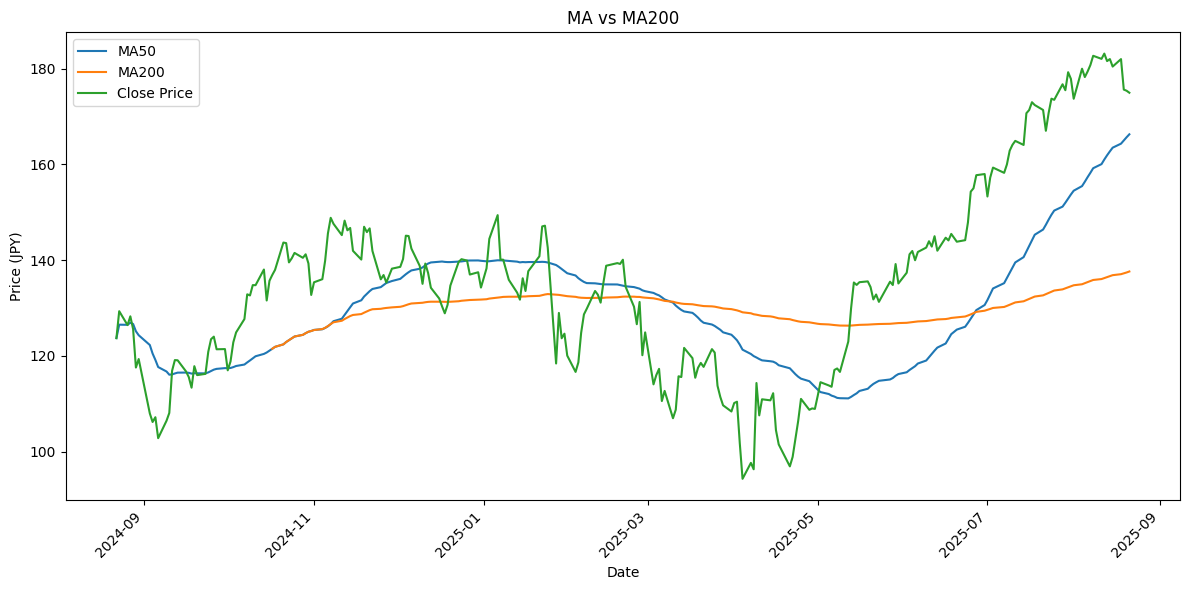

In [5]:
# 移动平均线
nvda_data.plot_ma()
# help(nvda_data)

2025/8/8 笔者保守认为Nvida由于生成AI、代理AI的过热期待太大，以至于过去的长期主义和现在的群众情绪有了较大脱节。

这个指标的参照不太具备参考性了。

## Bollinger Bands(布林带指标)
**核心构成————三线通道**
1.   上轨 = 20日移动平均线 + 2倍标准差  
2.   中轨 = 20日简单移动平均线（SMA20）  
3.   下轨 = 20日移动平均线 - 2倍标准差

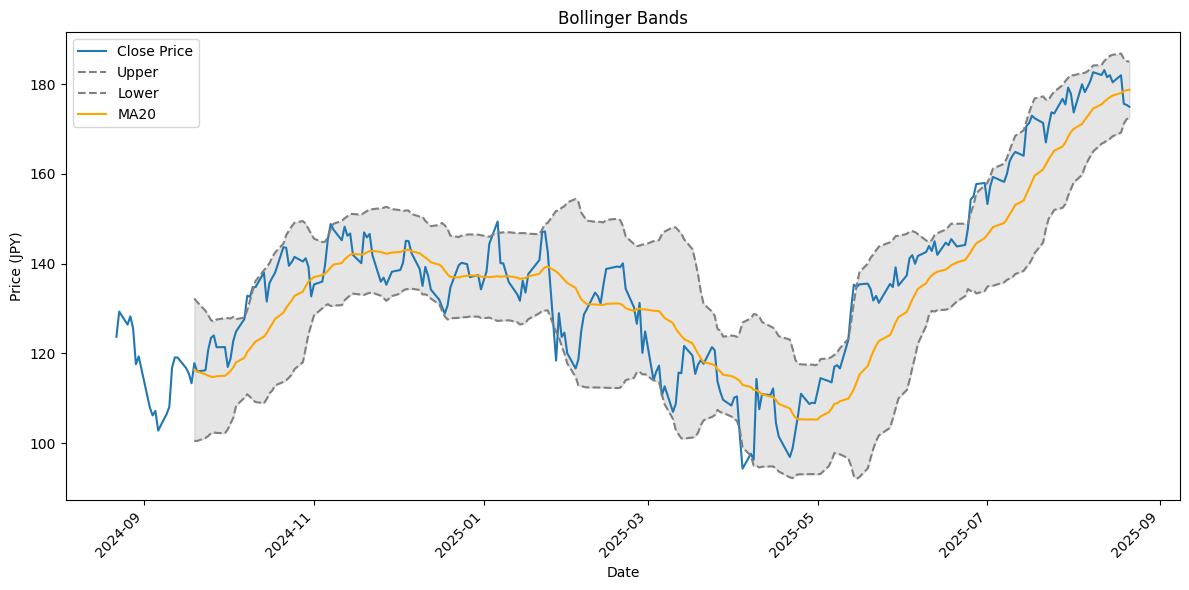

In [6]:
nvda_data.plot_bollinger_bands()

**波动率温度计​​**
1.   ​通道扩张​​：上轨↑+下轨↓ → 波动率增大（趋势启动前兆，如2023年NVIDIA突破前带宽扩大35%）
2.   通道收缩​​：上下轨向中轨靠拢 → 波动率降至低位（蓄势待破信号，称“布林带挤牙膏”）

关注美股新闻、只要资金回流美国大力搞AI的话能涨；但涨幅考虑每股收益的前年比在递减、潜力有限了。

**实战上来看触及上轨的“超买”不一定、要看基本面做估值**。<br />
在意的时间点发生的事件(考虑让Agent搜索这些技术面上震荡的时间点新闻)：<br />
2025-1月：
1.   deepseek出世、舆论震荡美国AI发展信心、NVDA下跌更多是恐惧心理（他人“恐惧”我“贪婪”,机会来了）——观望和准备加仓是上策。<br />
2.   美国升级AI芯片出口限制​​：美国商务部颁布​​史上最严出口管制​​，将限制范围从中国扩展至全球，中国被列为“高风险国家”，英伟达H20芯片遭禁售，55亿美元市场面临损失

2025-3~2025-5：
1.   H20芯片遭禁与替代方案加速：美国4月无限期禁止H20对华出口，英伟达立即启动​​新款降级版芯片研发​​，计划7月交付中国客户，性能降级但保供策略明确
2.   英伟达8月紧急发文​​否认芯片存在后门​​，强调“绝不植入终止开关”，维护客户信任

2025/8:
1. 政府加大投资Nvdia以外的芯片公司、动摇股民引流到其他地方（便宜买的好机会）
2. 降息周期快来了（便宜买的好机会）

整体评价：
1.   老黄负责、稳定股价预期
2.   技术上不触发回调、暂不存在上下波动







## MACD
EMA（指数平滑移动平均线）为基础：近期价格权重更高，权重按指数衰减（如昨日EMA占86%，新数据占14%）。

所以更适合高频振荡的情境交易来参考。（比如利好/利空消息出现）

*   新品发布，比如2025/8/8 Nintendo自家IP马里奥新商品发售
*   领域内策略改革（触发了提前预估内在价值），比如今年下半年开始的加密货币周期——SBI, mizuho喝一壶。

这些感觉都能在未来反映到MA50、MA200等技术面上，拭目以待一下（Nintendo为例观察一下）




2025/8/8 实际验证了Nintendo利好消息出现的时候、移动平均线不太能很好地反映实时的趋势。
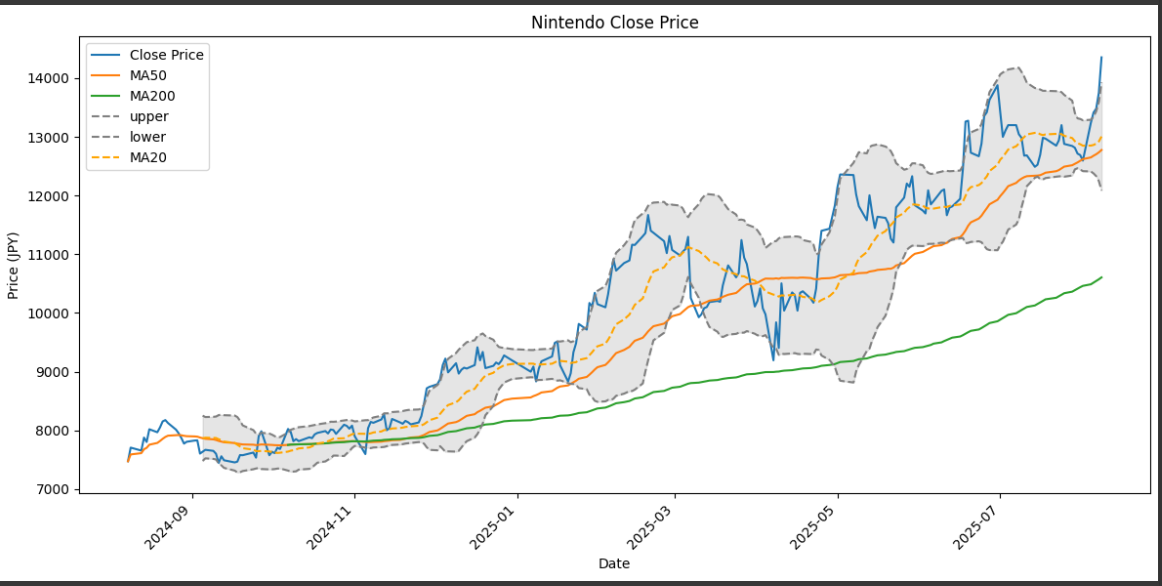

2025/8/12 看来这两天是按布林带技术指标回落了，布林带比较强的实时性啊（日均）。<br />
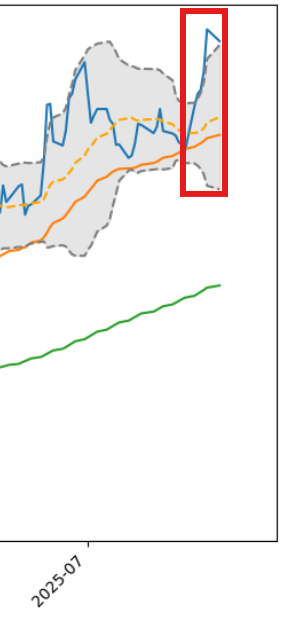

**换指数平均线(EMA)系列看看**


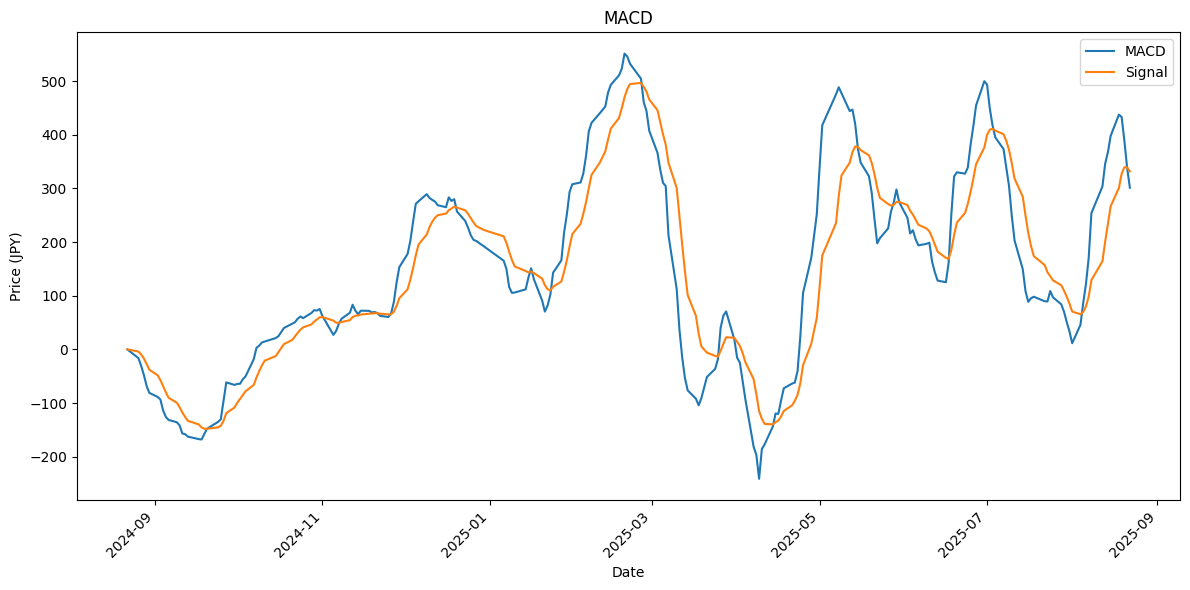

In [7]:
nintendo_data.plot_macd()

# 关于Stock Market打点基础

1. 首先，它是个拍卖系统(action system)<br />
  分为一级市场(primary market)与二级市场(secondary market)
2. 其次，其成为上市公司流程：<br />
  IPO(Intial Public Offering) 首次公募 -> 发行新股 -> ... 因此吸引到公众投资
3. “我要把‘商品’放在哪家店”——股票交易所
***（今明天给出整理！）***
  就像美国的纳斯达克斯重视科技股票交易、Amex重视ETF交易
  日本TOPIX、NIKKEI分别是什么交易所？
  中国的上交所、深交所、港交所的重点又是啥？
4. "**Who**" am I? <br />
  我是investor？那我就是“持有”而不是“交易”。<br />
  我是trador？那我就是尽可能赚钱，源头就是“散户”、那就是复杂策略+博弈。<br />


5. "**Who**" are your opponents? <br />
  有时，并不是一切利好消息都能促进股票增长、比如最近我自己关注的一支股票(9722.T)。中期财报披露：
  [藤田観、今期経常を一転3％増益に上方修正・最高益更新へ
](https://kabutan.jp/news/?&b=k202508080433)<br />
  投资者视角：到了冬天这家公司就会因为温泉设施获得岁月静好的利润（再加上图表说明），我在游客访日数量大增的时候就坚持持有了。<br />
  交易员视角：机构在哪里？动向如何？夏天机构看多看空？<br />

  总的来说，都不建议这时候买入啊……

7. 啥叫**基本面分析(fundamental analysis)**？啥叫**技术分析(technical analysis)**?<br />
  2025/8/19 分析下Softbank Group(9984.T)的基本面

8. 一些数据
  **商品贸易帐**，也称为货物贸易帐，指的是一个国家在特定时期内商品出口总额与进口总额之间的差额。如果出口额大于进口额，则称为贸易顺差或出超；反之，如果进口额大于出口额，则称为贸易逆差或入超。

9. Trending
  本质就是“共识”、越多人用的工具越能巩固共识。（不作为技术分析的一环了……）

10. Whys does **Volume** matter?
  类比：一人出价买某地段房50万元vs.两万人买某地段同条件房花30万元，后者的价格“更可信”。<br />
  获得某种交易共识：当下基本面没有内在价值的突破不足以变动价格了。<br />
  这在价值投资中也有所参考。如果之后有回调等，就可以看情况慢慢买入。<br />












### 看一下Nvdia成交量

In [8]:
nvda_data.plot_volume()

# 记录点个人心得

## 2025/8/13

最近是快速积累原始资本的两年，**目标：好股好趋势+交易员策略。**

## 2025/8/14

因为日股涨势太高(RSI MACD Bollinger Bands连月均线以上波动)，最近买入的都是S株、小幅持有，观望ing。<br />

S株：
8411.T 50 买 Bollinger Bands上限之下，技术面看好<br />
8473.T 0 买 超Bollinger Bands上限<br />
3284.T 0 买 超Bollinger Bands上限<br />
7974.T 0 买 超Bollinger Bands上限<br />





## 2025/8/18
Piper Sandler Raises NVIDIA (NVDA) Price Target to $225 Ahead of Earnings<br />
派杰投资2020年起股价翻倍仅330美元，去年2024.5压中美联储在未来9次会议将降息三次。事实是：2024年9至12月，美联储连续三次降息，累计降幅100个基点。<br />

## 2025/8/19
在蜡烛图一课中学到的：https://www.udemy.com/course/foundation-course/learn/lecture/7550446?start=690#overview

不应该看太多指标 6~7个足够做预测了。<br />
实际上的蜡烛信号（看到多空交战造成的开盘、收盘焦灼），还得观察两天，到第三天继续涨、那么顺势买入；卖出同理。<br />

看到big candle 能明白多空势力势不可挡了，能立即顺势赚钱。<br />
サンリオ为例，等踏空的地方回调了。<br />
做空最好Day trading, 避免贪婪、记得恐惧。<br />

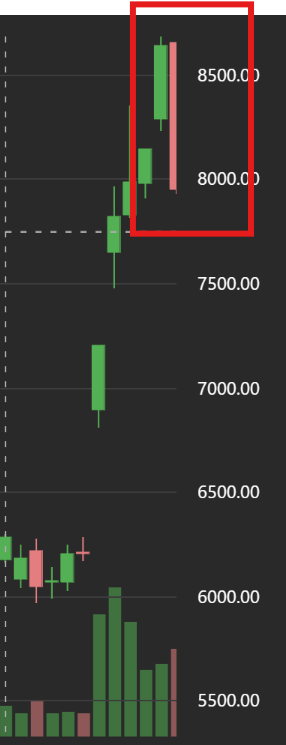

SB(9984.T)基本面
1. SoftBank makes $2B investment in Intel<br />
  有段联想：政府芯片补贴的现金转化为股权、大力投资Intel，加大出口半导体关税；日本7月承诺5000亿美元的投资

2. 员工6w+，2021~2025保持稳定涨幅。 => **是不是再关注下员工招聘的契机更保险**
3. 政治环境：和OpenAI合作、投资Trump支持的Intel，利好短期资本，因此短期的市场增量有投机的偏好。
4. 一些计算指标：市盈率22.84x；历史市盈率平均：15x以下。（第一期收益不错、有超预想的可能）
5. 投资ARM芯片中(**ARM表现不是很明白，说实话不感兴趣……**)



## 2025/8/20
1. 日本公布贸易帐（未季调）<br />
  今值-117.5B	预计196.2B	前值152.1B，出口量依旧不及预期，表现为TOPIX、日经微下调。（想买的Nintendo、スシロー还是太贵了……）

## 2025/8/21
日经继续小幅下调。<br />
看下sushiro(3563.T)、Nintendo(7974.T)的交易量。<br />


In [9]:
df_sushiro = yf.download(["3563.T"], period="1y", interval="1d")
df_sushiro.columns = ["Close","High","Low","Open","Volume"]
df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")
df_nintendo.columns = ["Close","High","Low","Open","Volume"]



df_gumi = yf.download(["3903.T"], period="1y", interval="1d")
df_gumi.columns = ["Close","High","Low","Open","Volume"]
df_meta_planet = yf.download(["3350.T"], period="1y", interval="1d")
df_meta_planet.columns = ["Close","High","Low","Open","Volume"]

C:\Users\yuting.d.zhang\AppData\Local\Temp\ipykernel_13236\937245802.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\yuting.d.zhang\AppData\Local\Temp\ipykernel_13236\937245802.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\yuting.d.zhang\AppData\Local\Temp\ipykernel_13236\937245802.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\yuting.d.zhang\AppData\Local\Temp\ipykernel_13236\937245802.py:10: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [10]:
nintendo_data.plot_volume()

In [11]:
TechnicalAnalysis(df_sushiro).plot_volume()

1. 2025/5/9 在决算期后大量交易、收盘价5750合适。<br />
2. 2025/8/6 在决算期后大量交易、收盘价7713合适。<br />
3. 一个财报周期一次大交易。<br />

餐饮行业估值困难、好方法就是定投股票。等放财报、大波动时期交易一波<br />